In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 100
optimizer = Adam()
verbosity = 1

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import urllib

import numpy as np
import tensorflow as tf

# Data sets
IRIS_TRAINING = "iris_training.csv"
IRIS_TEST = "iris_test.csv"

def main():
  # Load datasets.
  training_set = tf.contrib.learn.datasets.base.load_csv_with_header(
      filename=IRIS_TRAINING,
      target_dtype=np.int,
      features_dtype=np.float32)
  
  test_set = tf.contrib.learn.datasets.base.load_csv_with_header(
      filename=IRIS_TEST,
      target_dtype=np.int,
      features_dtype=np.float32)

  # Specify that all features have real-value data
  feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]

  # Build 3 layer DNN
  classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                              hidden_units=[5,10,5],
                                              n_classes=3)
  # Define the training inputs
  def get_train_inputs():
    x = tf.constant(training_set.data)
    y = tf.constant(training_set.target)

    return x, y

  # Fit model.
  classifier.fit(input_fn=get_train_inputs, steps=2000)

  # Define the test inputs
  def get_test_inputs():
    x = tf.constant(test_set.data)
    y = tf.constant(test_set.target)

    return x, y

  # Evaluate accuracy.
  accuracy_score = classifier.evaluate(input_fn=get_test_inputs,
                                       steps=1)["accuracy"]

  print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

  # Classify new flower
  def new_samples():
    return np.array([[6.4, 2.7, 5.6, 2.1]], dtype=np.float32)

  predictions = list(classifier.predict(input_fn=new_samples))

  print("Predicted class: {}\n".format(predictions))

if __name__ == "__main__":
    main()


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [ ]:
class BostonDataset(torch.utils.data.Dataset):
  '''
  Prepare the Boston dataset for regression
  '''

  def __init__(self, X, y, scale_data=True):
    if not torch.is_tensor(X) and not torch.is_tensor(y):
        
      # Apply scaling if necessary
        if scale_data:
            X = StandardScaler().fit_transform(X)
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

In [ ]:
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
          nn.Linear(13, 64),
          nn.ReLU(),
          nn.Linear(64, 32),
          nn.ReLU(),
          nn.Linear(32, 1)
    )


    def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [ ]:
if __name__ == '__main__':
  
  # Set fixed random number seed
    torch.manual_seed(42)
  
    X = data.drop(['epsilon','tan_del','index'],axis=1).values
    y=data['epsilon'].values

In [ ]:
import pandas as pd
data=pd.read_csv ('ff.csv',index_col=False)


In [ ]:
dataset = BostonDataset(X,y)
trainloader = torch.utils.data.DataLoader(data, batch_size=10, shuffle=True, num_workers=1)

In [ ]:
trainloader

In [ ]:
mlp = MLP()
  
  # Define the loss function and optimizer
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [ ]:
for epoch in range(0, 5): # 5 epochs at maximum
    
    # Print epoch
    print(f'Starting epoch {epoch+1}')
    
    # Set current loss value
    current_loss = 0.0
    
    # Iterate over the DataLoader for training data
    for i, data in enumerate(trainloader, 0):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        targets = targets.reshape((targets.shape[0], 1))

        optimizer.zero_grad()
        outputs = mlp(inputs)

        loss = loss_function(outputs, targets)

        loss.backward()

              # Perform optimization
        optimizer.step()

              # Print statistics
        current_loss += loss.item()
        if i % 10 == 0:
            print('Loss after mini-batch %5d: %.3f' %
                 (i + 1, current_loss / 500))
            current_loss = 0.0

  # Process is complete.
print('Training process has finished.')

In [ ]:
X, y = load_boston(return_X_y=True)

In [ ]:
X

In [ ]:
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # store the inputs and outputs
        self.X = ...
        self.y = ...
 
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)
 
    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

In [ ]:
import pandas as pd
data=pd.read_csv ('ff.csv',index_col=False)


In [ ]:
import torch

In [ ]:
# pytorch mlp for binary classification
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path)
        # store the inputs and outputs
        self.X = data.drop(['index','tan_del','epsilon'],axis=1).values
        self.y = data.drop(['index','SP_imag','SP_real','frequency','epsilon'],axis=1).values
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split

    train, test =  data.drop(['tan_del','epsilon','index'],axis=1).values, dataset.drop(['frequency','SP_real','SP_imag','index','epsilon'],axis=1).values
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# prepare the data
path = "ff.csv"
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network

model = MLP(3)
# train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)
# make a single prediction (expect class=1)
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = predict(row, model)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

In [ ]:
\

In [ ]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
train_dl, test_dl = prepare_data(path)

In [ ]:
train_dl.dataset.dataset.X

In [ ]:
train_dl.dataset.dataset.X

In [ ]:
# pytorch mlp for binary classification
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# prepare the data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(34)
# train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)
# make a single prediction (expect class=1)
row = [1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300]
yhat = predict(row, model)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

In [ ]:
train_dl

In [ ]:
train_dl.dataset.dataset.X

In [ ]:
criterion = BCELoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

In [ ]:
inputs

In [ ]:
inputs

In [ ]:
train_dl

In [ ]:
x=pd.read_csv('ff.csv')

In [ ]:
a=x['SP_imag'][1]

In [ ]:
type(a)

In [ ]:
dataset = CSVDataset(path)
    # calculate split
    train, test =  data.drop(['tan_del','epsilon'],axis=1).values, data.drop(['frequency','SP_real','SP_imag'],axis=1).values
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl


In [ ]:
dataset = CSVDataset('https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv')

In [ ]:
dataset

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from network import Net
from torch.utils.data import dataset
from sklearn.preprocessing import StandardScaler

In [ ]:
class FeatureDataset(Dataset):
    def __init__(self,file_name):
        file_out=pd.read_csv(file_name)
        x=file_out.drop(['tan_del','epsilon','index'],axis=1).values
        y=file_out.drop(['frequency','SP_real','SP_imag','index','epsilon'],axis=1)
        
        sc=StandardScaler()
        
        x_train=sc.fit_transform(x)
        y_train=y
        
        slf.X_train=torch.sensor(x_train,dtype=torch.float32)
        self.y_train=torch.tensor(y_train)
        
    def __len__(self):
        return len(sel.y_train)
    def __getitem__(self,idx):
        return self.X_train[idx],self.y_train[idx]
    
    
    

In [ ]:
import pandas as pd
data=pd.read_csv ('ff.csv',index_col=False)


In [ ]:
train_loader=torch.utils.data.DataLoader(data,batch_size=10,shuffle=True)

In [ ]:
data=data.drop(['index'],axis=1)

In [ ]:
import pythonnet

In [ ]:
data.drop(['tan_del','epsilon','index'],axis=1).values, dataset.drop(['frequency','SP_real','SP_imag','index','epsilon'],axis=1)

In [ ]:
def ann_viz(model, view=True, filename="network.gv"):
    """Vizualizez a Sequential model.

    # Arguments
        model: A Keras model instance.

        view: whether to display the model after generation.

        filename: where to save the vizualization. (a .gv file)

        title: A title for the graph
    """
    from graphviz import Digraph

    input_layer = 0
    hidden_layers_nr = 0
    layer_types = []
    hidden_layers = []
    output_layer = 0
    layers = [layer for layer in model.modules() if type(layer) == torch.nn.Linear]

    for layer in layers:
        if layer == layers[0]:
            input_layer = layer.in_features
            hidden_layers_nr += 1
            if type(layer) == torch.nn.Linear:                
                hidden_layers.append(layer.out_features)
                layer_types.append("Dense")
            else:
                raise Exception("Input error")

        else:
            if layer == layers[-1]:
                output_layer = layer.out_features
            else:
                hidden_layers_nr += 1
                if type(layer) == torch.nn.Linear:

                    hidden_layers.append(layer.out_features)
                    layer_types.append("Dense")
                else:
                    raise Exception("Hidden error")
        last_layer_nodes = input_layer
        nodes_up = input_layer

    g = Digraph("g", filename=filename)
    n = 0
    g.graph_attr.update(splines="false", nodesep="0.5", ranksep="0", rankdir='LR')
    # Input Layer
    with g.subgraph(name="cluster_input") as c:
        if type(layers[0]) == torch.nn.Linear:
            the_label = "Input Layer"
            if layers[0].in_features > 10:
                the_label += " (+" + str(layers[0].in_features - 10) + ")"
                input_layer = 10
            c.attr(color="white")
            for i in range(0, input_layer):
                n += 1
                c.node(str(n))
                c.attr(labeljust="1")
                c.attr(label=the_label, labelloc="bottom")
                c.attr(rank="same")                
                c.node_attr.update(
                    width="0.65",
                    style="filled",                    
                    shape="circle",
                    color=HAPPY_COLORS_PALETTE[3],
                    fontcolor=HAPPY_COLORS_PALETTE[3],
                )
    for i in range(0, hidden_layers_nr):
        with g.subgraph(name="cluster_" + str(i + 1)) as c:
            if layer_types[i] == "Dense":
                c.attr(color="white")
                c.attr(rank="same")
                the_label = f'Hidden Layer {i + 1}'
                if layers[i].out_features > 10:
                    the_label += " (+" + str(layers[i].out_features - 10) + ")"
                    hidden_layers[i] = 10
                c.attr(labeljust="right", labelloc="b", label=the_label)
                for j in range(0, hidden_layers[i]):
                    n += 1
                    c.node(
                        str(n),
                        width="0.65",
                        shape="circle",
                        style="filled",
                        color=HAPPY_COLORS_PALETTE[0],
                        fontcolor=HAPPY_COLORS_PALETTE[0],
                    )
                    for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                        g.edge(str(h), str(n))
                last_layer_nodes = hidden_layers[i]
                nodes_up += hidden_layers[i]
            else:
                raise Exception("Hidden layer type not supported")

    with g.subgraph(name="cluster_output") as c:
        if type(layers[-1]) == torch.nn.Linear:
            c.attr(color="white")
            c.attr(rank="same")
            c.attr(labeljust="1")
            for i in range(1, output_layer + 1):
                n += 1
                c.node(
                    str(n),
                    width="0.65",
                    shape="circle",
                    style="filled",
                    color=HAPPY_COLORS_PALETTE[4],
                    fontcolor=HAPPY_COLORS_PALETTE[4],
                    
                )
                for h in range(nodes_up - last_layer_nodes + 1, nodes_up + 1):
                    g.edge(str(h), str(n))
            c.attr(label="Output Layer", labelloc="bottom")
            c.node_attr.update(
                color="#2ecc71", style="filled", fontcolor="#2ecc71", shape="circle"
            )

    g.attr(arrowShape="none")
    g.edge_attr.update(arrowhead="none", color="#707070", penwidth="2")
    if view is True:
        g.view()

    return g


In [ ]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from torch import nn, optim

import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
df=pd.read_csv ('ff.csv',index_col=False)


In [ ]:
X = df[['SP_imag', 'SP_real', 'frequency']]
y = df[['epsilon']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=RANDOM_SEED)

In [ ]:
X_train = torch.from_numpy(X_train.to_numpy()).float()
y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).float())

X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).float())

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
class Net(nn.Module):

    def __init__(self, n_features):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_features, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [ ]:
net = Net(X_train.shape[1])



In [ ]:
criterion = nn.BCELoss()

In [ ]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

In [ ]:
net = net.to(device)

criterion = criterion.to(device)

In [ ]:
def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

In [ ]:
def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)

for epoch in range(1000):
    
    y_pred = net(X_train)
    
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    
    if epoch % 100 == 0:
        train_acc = calculate_accuracy(y_train, y_pred)

        y_test_pred = net(X_test)
        y_test_pred = torch.squeeze(y_test_pred)

        test_loss = criterion(y_test_pred, y_test)

        test_acc = calculate_accuracy(y_test, y_test_pred)
        print(
                f'''epoch {epoch}
                Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
                Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
                ''')
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

In [ ]:
y_test_pred

In [ ]:
y_test

C:\Users\AliReza\Desktop\WEnvs\py3.7\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5
1,22,8.0,-0.332625031,-0.22542052,0.0,1.0
2,23,8.00399971,-0.341092855,-0.2078062,0.0,1.0
3,24,8.008000374,-0.348622531,-0.189921886,0.0,1.0
4,25,8.012000084,-0.355208993,-0.171817496,0.0,1.0
5,26,8.015999794,-0.360849917,-0.153542429,0.0,1.0
...,...,...,...,...,...,...
814810,829605,11.984,0.395022,-0.019654,0.5,4.0
814811,829606,11.988,0.393918,-0.032102,0.5,4.0
814812,829607,11.992,0.392425,-0.044496,0.5,4.0
814813,829608,11.996,0.390545,-0.056826,0.5,4.0


,1,2,3,4,5
1,8.0,-0.332625031,-0.22542052,0.0,1.0
2,8.00399971,-0.341092855,-0.2078062,0.0,1.0
3,8.008000374,-0.348622531,-0.189921886,0.0,1.0
4,8.012000084,-0.355208993,-0.171817496,0.0,1.0
5,8.015999794,-0.360849917,-0.153542429,0.0,1.0
...,...,...,...,...,...
814810,11.984,0.395022,-0.019654,0.5,4.0
814811,11.988,0.393918,-0.032102,0.5,4.0
814812,11.992,0.392425,-0.044496,0.5,4.0
814813,11.996,0.390545,-0.056826,0.5,4.0


In [8]:
ee2.to_csv('nnnn.csv')

In [ ]:
pd.read_csv('nnnn.csv')

In [ ]:
# pytorch mlp for binary classification
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path)
        print(df)
        # store the inputs and outputs
        self.X = df.values[:, 1:4]
        print(self.X)
        self.y = df.values[:, 4]
        print(self.y)
        # ensure input data is floats
        self.X = self.X.astype('float32')
        # label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.33):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# prepare the data
path = 'nnnn.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(3)
# train the model
train_model(train_dl, model)
# evaluate the model
acc = evaluate_model(test_dl, model)
print('Accuracy: %.3f' % acc)
# make a single prediction (expect class=1)
row = [8,-0.332625031,-0.22542052]
yhat = predict(row, model)
print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

In [ ]:
print('fuck89')

In [ ]:
row = [11.99199963 , 0.392425 ,  -0.04449595]

yhat = predict(row, model)

print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

In [ ]:
predd

In [ ]:
df.values[:,4]
        

In [ ]:
# pytorch mlp for regression
from numpy import vstack
from numpy import sqrt
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_

# dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path,header=None)
        # store the inputs and outputs
        self.X = df.values[:, 1:4].astype('float32')
        print(self.X)
        self.y = df.values[:, 4].astype('float32')
        print(self.y)
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.03):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        xavier_uniform_(self.hidden1.weight)
        self.act1 = Sigmoid()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        xavier_uniform_(self.hidden2.weight)
        self.act2 = Sigmoid()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(3):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate mse
    mse = mean_squared_error(actuals, predictions)
    return mse

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# prepare the data
path = 'nnnn.csv'
train_dl, test_dl = prepare_data(path)
print(len(train_dl.dataset), len(test_dl.dataset))
# define the network
model = MLP(3)
# train the model
train_model(train_dl, model)
# evaluate the model
mse = evaluate_model(test_dl, model)
print('MSE: %.3f, RMSE: %.3f' % (mse, sqrt(mse)))
# make a single prediction (expect class=1)
row = [11.99199963 , 0.392425 ,  -0.04449595]

yhat = predict(row, model)
print('Predicted: %.3f' % yhat)

In [ ]:
row = [8.       ,  -0.33262503, -0.22542052]

yhat = predict(row, model)

print('Predicted: %.3f (class=%d)' % (yhat, yhat.round()))

In [ ]:
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

In [ ]:
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path,header=None)
        # store the inputs and outputs
        self.X = df.values[:, 1:4].astype('float32')
        print(self.X)
        self.y = df.values[:, 4].astype('float32')
        print(self.y)
        # ensure target has the right shape
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
    def get_splits(self, n_test=0.03):
        # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

In [ ]:
import torch

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and 
        assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary (differentiable) operations on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1000000, 3,10, 1

# Create random Tensors to hold inputs and outputs
x = torch.from_numpy(df.values[:, 1:4].astype('float32'))
y =  torch.from_numpy(df.values[:, 4].astype('float32'))
y = y.reshape((len(y), 1))

# Construct our model by instantiating the class defined above.
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to 
model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
loss_fn = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
torch.from_numpy(np.asarray(row))

In [ ]:
y_pred

In [ ]:
import torch

class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and 
        assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary (differentiable) operations on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above.
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to 
model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
loss_fn = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
y[1]

In [ ]:
row = tensor.[8.       ,  -0.33262503, -0.22542052]
model(row)

In [28]:
ee=pd.read_csv('ff.csv',header=None,index_col=False)
ee1=ee.drop([0],axis=1)
ee2=ee1.drop(0)
ee2
ee2.to_csv('nnnn.csv',header=None)

In [2]:
import pandas as pd

In [36]:
data1=pd.read_csv('nnnn.csv',header=None,index_col=False)
data2=data1.drop([0],axis=1)
data2

,1,2,3,4,5
0,8.000,-0.332625,-0.225421,0.0,1.0
1,8.004,-0.341093,-0.207806,0.0,1.0
2,8.008,-0.348623,-0.189922,0.0,1.0
3,8.012,-0.355209,-0.171817,0.0,1.0
4,8.016,-0.360850,-0.153542,0.0,1.0
...,...,...,...,...,...
814809,11.984,0.395022,-0.019654,0.5,4.0
814810,11.988,0.393918,-0.032102,0.5,4.0
814811,11.992,0.392425,-0.044496,0.5,4.0
814812,11.996,0.390545,-0.056826,0.5,4.0


In [72]:
import torch
inputs=data2.values[:, 0:3]
targets=data2.values[:, 4]
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [74]:
targets

tensor([1., 1., 1.,  ..., 4., 4., 4.], dtype=torch.float64)

In [75]:
from torch.utils.data import TensorDataset
dataset = TensorDataset(inputs, targets)

In [151]:
from torch.utils.data import DataLoader

batch_size = 20
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [152]:
for inp,target in train_loader:
    print(inp)
    print(target)
    break

tensor([[11.0840,  0.3205,  0.4259],
        [ 9.1640,  0.2488, -0.6248],
        [10.8960, -0.4189,  0.3028],
        [10.3560,  0.4368,  0.3674],
        [11.3960, -0.0502, -0.4842],
        [11.6320, -0.5715,  0.1377],
        [ 8.1960, -0.3953,  0.4249],
        [ 9.7880,  0.4839, -0.2637],
        [ 9.3120, -0.4805, -0.3233],
        [10.5240,  0.4814, -0.3724],
        [10.8680, -0.5645, -0.1593],
        [10.4320,  0.5204,  0.0944],
        [11.9640,  0.4375,  0.0201],
        [10.6840, -0.2293, -0.4776],
        [10.6320, -0.0168, -0.5258],
        [11.0160,  0.0165,  0.5036],
        [ 9.8360,  0.3267, -0.4929],
        [ 8.8680, -0.2049,  0.4935],
        [ 9.1920,  0.1215, -0.5237],
        [ 8.4920,  0.5194, -0.4366]], dtype=torch.float64)
tensor([3.2000, 2.2000, 2.2000, 1.8000, 3.4000, 2.8000, 3.8000, 3.2000, 2.8000,
        1.6000, 3.0000, 2.8000, 3.4000, 1.4000, 2.0000, 2.2000, 3.8000, 1.2000,
        1.6000, 2.2000], dtype=torch.float64)


In [155]:
cd=(0.01*ones(1, 3, requires_grad=True))

NameError: name 'ones' is not defined

In [173]:
w = torch.ones(1, 3, requires_grad=True)
b = torch.ones(1, requires_grad=True)
print(w)
print(b)

tensor([[1., 1., 1.]], requires_grad=True)
tensor([1.], requires_grad=True)


In [174]:
def model(X):
    return X @ w.t() + b



In [175]:
for x,y in train_loader:
    preds = model(x.float())
    print("Prediction is :n",preds)
    print("nActual targets is :n",y)
    break

Prediction is :n tensor([[11.1396],
        [10.6184],
        [11.3816],
        [ 8.9063],
        [10.0347],
        [ 8.1575],
        [11.8533],
        [ 9.8219],
        [ 8.3865],
        [ 9.0352],
        [10.4591],
        [10.2508],
        [11.9788],
        [12.0085],
        [12.6649],
        [10.5177],
        [12.3980],
        [13.0894],
        [13.5073],
        [11.0083]], grad_fn=<AddBackward0>)
nActual targets is :n tensor([4.0000, 1.0000, 2.2000, 1.8000, 1.6000, 3.0000, 2.0000, 1.8000, 3.6000,
        2.0000, 2.8000, 2.8000, 2.2000, 3.8000, 3.6000, 1.0000, 2.4000, 2.2000,
        1.8000, 1.6000], dtype=torch.float64)


In [176]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference)/ difference.numel()

In [177]:
epochs = 100
for i in range(epochs):
    # Iterate through training dataloader
    for x,y in train_loader:
        # Generate Prediction
        preds = model(x.float())
        # Get the loss and perform backpropagation
        loss = mse_loss(preds, y)
        loss.backward()
        # Let's update the weights
        with torch.no_grad():
            w -= w.grad *1e-5
            b -= b.grad * 1e-5
            # Set the gradients to zero
            w.grad.zero_()
            b.grad.zero_()
        
    print(f"Epoch {i}/{epochs}: Loss: {loss}")


Epoch 0/50: Loss: 1.0895110980864893
Epoch 1/50: Loss: 1.323842732455543
Epoch 2/50: Loss: 1.052124513096005
Epoch 3/50: Loss: 1.3638195781016367
Epoch 4/50: Loss: 1.226634356773366
Epoch 5/50: Loss: 0.9486033431298835
Epoch 6/50: Loss: 1.1413187505912834
Epoch 7/50: Loss: 0.9216775698030916
Epoch 8/50: Loss: 0.8338946496032879
Epoch 9/50: Loss: 0.7058347065155185
Epoch 10/50: Loss: 0.6304994866266972
Epoch 11/50: Loss: 0.9333842477909444
Epoch 12/50: Loss: 0.9840117399303027
Epoch 13/50: Loss: 0.6665203502822895
Epoch 14/50: Loss: 1.0180778577513394
Epoch 15/50: Loss: 0.7099039890589903
Epoch 16/50: Loss: 0.7003848161567381
Epoch 17/50: Loss: 0.9917188379603236
Epoch 18/50: Loss: 0.7774255077542818
Epoch 19/50: Loss: 0.8974366085654812
Epoch 20/50: Loss: 0.9100825448043631
Epoch 21/50: Loss: 0.7166800590634763
Epoch 22/50: Loss: 1.0338812392572716
Epoch 23/50: Loss: 0.7306500000191907
Epoch 24/50: Loss: 0.7435212930059598
Epoch 25/50: Loss: 1.0336924139843044
Epoch 26/50: Loss: 0.7570

In [179]:
for x,y in train_loader:
    preds = model(x.float())
    print("Prediction is :n",preds)
    print("nActual targets is :n",y)
    break

Prediction is :n tensor([[2.3295],
        [2.3404],
        [2.5096],
        [2.5076],
        [2.5432],
        [2.5278],
        [2.6184],
        [2.4423],
        [2.5063],
        [2.4469],
        [2.3813],
        [2.5100],
        [2.4845],
        [2.6174],
        [2.6449],
        [2.4911],
        [2.5945],
        [2.3856],
        [2.5116],
        [2.5087]], grad_fn=<AddBackward0>)
nActual targets is :n tensor([2.4000, 2.4000, 2.8000, 3.2000, 2.2000, 3.6000, 2.8000, 1.2000, 4.0000,
        2.0000, 2.0000, 1.4000, 1.4000, 1.2000, 2.0000, 3.4000, 2.6000, 3.6000,
        2.2000, 1.4000], dtype=torch.float64)


In [90]:
for x,y in train_loader:
    preds = model(x.float())
    print("Prediction is :n",preds)
    print("nActual targets is :n",y)
    break

Prediction is :n tensor([[2.3927],
        [2.5668],
        [2.0179]], grad_fn=<AddBackward0>)
nActual targets is :n tensor([2.2000, 1.0000, 3.4000], dtype=torch.float64)


In [91]:
x

tensor([[ 9.1120,  0.4836, -0.4124],
        [10.0680, -0.4742, -0.1171],
        [ 8.1600, -0.5290,  0.2811]], dtype=torch.float64)

In [180]:
import torch
import torch.nn as nn 

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [488]:
data1=pd.read_csv('nnnn.csv',header=None,index_col=False)
data2=data1.drop([0],axis=1)
data2

X_train = data2.values[:,:3]
y_train = data2.values[:,4]

In [341]:
sc = MinMaxScaler()
sct = MinMaxScaler()
X_train=sc.fit_transform(X_train.reshape(len(X_train),3))
y_train =sct.fit_transform(y_train.reshape(len(y_train),1))

In [489]:
type(X_train)

numpy.ndarray

In [517]:
y_pred

tensor([[nan],
        [nan],
        [nan],
        ...,
        [nan],
        [nan],
        [nan]], grad_fn=<AddmmBackward0>)

In [516]:
data1=pd.read_csv('nnnn.csv',header=None,index_col=False)
data2=data1.drop([0],axis=1)
data2

x_train = data2.values[:,:3]
y_train = data2.values[:,4]
x_train = torch.from_numpy(x_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(len(y_train),1))

import torch

" Data for training"

model = torch.nn.Sequential(torch.nn.Linear(3, 1),torch.nn.ReLU(),torch.nn.Linear(1, 1),)

loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(5000):
    y_pred = model(x_train)
    loss = loss_fn(y_pred, y_train)
    if t % 1000 == 999:
        print(t, loss.item())
    
    model.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            
y_pred_to_validate = model(x_test)
print(y_pred_to_validate.detach().numpy())

999 nan
1999 nan
2999 nan


KeyboardInterrupt: 

In [492]:
input_size = 3
output_size = 1

In [493]:
class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(3,1)  # One in and one out

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [494]:
model = torch.nn.Sequential(torch.nn.Linear(3, 1),torch.nn.ReLU(),torch.nn.Linear(1, 3),)

In [495]:
learning_rate = 0.01
l = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr =learning_rate )

In [496]:
num_epochs = 2000
for epoch in range(num_epochs):
    #forward feed
    y_pred = model(X_train.requires_grad_())

    #calculate the loss
    loss= l(y_pred, y_train)

    #backward propagation: calculate gradients
    loss.backward()

    #update the weights
    optimizer.step()

    #clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))

C:\Users\AliReza\Desktop\WEnvs\py3.7\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([814814])) that is different to the input size (torch.Size([814814, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (3) must match the size of tensor b (814814) at non-singleton dimension 1

In [419]:
input_size

3

In [487]:
y_train

tensor([[1.],
        [1.],
        [1.],
        ...,
        [4.],
        [4.],
        [4.]])

In [376]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

X_train = data2.values[:,:3]
y_train = data2.values[:,4]

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
x = torch.unsqueeze(X_train,dim=1)  # x data (tensor), shape=(100, 1)
y =torch.unsqueeze(y_train,dim=1)          # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(3, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 64
EPOCH = 200

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients


    



C:\Users\AliReza\Desktop\WEnvs\py3.7\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Users\AliReza\Desktop\WEnvs\py3.7\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([30, 1])) that is different to the input size (torch.Size([30, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [468]:
data1=pd.read_csv('nnnn.csv',header=None,index_col=False)
data2=data1.drop([0],axis=1)
data2

X_train = data2.values[:,:3]
y_train = data2.values[:,4]

In [469]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [470]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

#X_train=mm.fit_transform(X_train.reshape(len(X_train),3))
#y_train =ss.fit_transform(y_train.reshape(len(y_train),1))


X_train = torch.from_numpy(X_train.astype(np.float32).reshape(len(X_train),3))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(len(X_train),1))

In [472]:
X_train_tensors_final = torch.reshape(X_train,   (X_train.shape[0], 1, X_train.shape[1]))
y_train_tensors = Variable(torch.Tensor(y_train))

In [473]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out
 

In [475]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.01 #0.001 lr

input_size = 3 #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [476]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1])

In [477]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [478]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
    loss = criterion(outputs, y_train_tensors)
 
    loss.backward() #calculates the loss of the loss function
 
    optimizer.step() #improve from loss, i.e backprop
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 7.46332


KeyboardInterrupt: 

In [459]:
outputs

tensor([[-0.0209],
        [-0.0209],
        [-0.0209],
        ...,
        [-0.0209],
        [-0.0209],
        [-0.0209]], grad_fn=<AddmmBackward0>)

In [471]:
 y_train

tensor([[1.],
        [1.],
        [1.],
        ...,
        [4.],
        [4.],
        [4.]])

In [528]:


x=X_train
y=y_train
x = x.reshape(x.shape[0], x.shape[1])
y=y.reshape(y.shape[0], 1)
print(x.shape)

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.05)

model = Sequential()
model.add(Conv1D(32, 3, activation="relu", input_shape=(3,1)))
model.add(Flatten())
model.add(Dense(3, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()
model.fit(xtrain, ytrain, batch_size=50,epochs=20, verbose=1)

#ypred = model.predict(xtest)

(814814, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1, 32)             128       
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause

KeyboardInterrupt: 

In [523]:
keras.models.

814814

In [535]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error

# Generate a sample dataset from random data: 
random.seed(123)
def CreateDataset(N):
 a,b,c,y = [],[],[],[]
 for i in range(N):    
  aa = i/10+random.uniform(-4,3)
  bb = i/30+random.uniform(-4,4)
  cc = i/40+random.uniform(-3,3)-5
  yy = (aa+bb+cc/2)/3
  a.append([aa])
  b.append([bb])
  c.append([cc])
  y.append([yy])
 return np.hstack([a,b,c]), np.array(y)

N = 150
x,y = CreateDataset(N)

In [536]:
x

array([[-3.63345481, -3.30250658, -5.55654942],
       [-3.14609836,  3.24292436, -7.746078  ],
       [-0.04658572, -1.27575175, -2.83748029],
       [-2.58236322, -1.20226674, -5.92222163],
       [-1.88385653, -3.85330224, -5.28234524],
       [-2.8867055 ,  0.94746238, -7.45573823],
       [-1.19178718, -0.21342633, -2.41760809],
       [-2.65064807, -2.62926615, -3.08456893],
       [-3.05134818,  3.55587105, -4.35955149],
       [-1.24274806,  3.00270115, -3.16223152],
       [-0.59576489,  2.74530606, -6.50882518],
       [ 1.36231768,  0.58326628, -2.86896885],
       [-0.59315793, -0.41409479, -3.08432546],
       [ 0.88926494,  1.91203108, -3.84488041],
       [ 2.06660342,  3.58745523, -4.73318118],
       [ 2.17929155, -0.50382695, -7.43395216],
       [ 2.8792122 , -2.01494734, -2.67885889],
       [ 4.09552138,  1.83125993, -6.55423867],
       [ 0.15841307, -0.27045354, -7.11025533],
       [ 1.09736949,  1.21868145, -5.5083634 ],
       [-0.67656691, -2.62807497, -3.730

In [607]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data1=pd.read_csv('nnnn.csv',header=None,index_col=False)
data2=data1.drop([0],axis=1)
data2

X_train = data2.values[:,:3]
y_train = data2.values[:,4]
x=X_train
y=y_train

In [608]:
y

array([1., 1., 1., ..., 4., 4., 4.])

In [540]:
def BuildModel():
    model = Sequential()
    model.add(Dense(128, input_dim=3,activation='relu')) 
    model.add(Dense(32, activation='relu')) 
    model.add(Dense(8,activation='relu')) 
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_squared_error", optimizer="adam")   
    return model

BuildModel().summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               512       
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,913
Trainable params: 4,913
Non-trainable params: 0
_________________________________________________________________


In [557]:
regressor = KerasPredict(build_fn=BuildModel,nb_epoch=10,batch_size=50)
regressor.fit(x,y) 

y_pred = regressor.predict(x)
mse_krr = mean_squared_error(y, y_pred)
print(mse_krr)


NameError: name 'KerasPredict' is not defined

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25463/25463 [==============================] - 79s 3ms/step - loss: 1.0928
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_

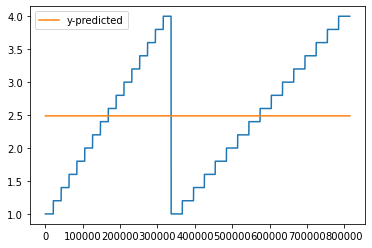

In [554]:
model = BuildModel()
model.fit(x, y,  verbose=1, shuffle=1)
y_krm = model.predict(x)
mse_krm=mean_squared_error(y, y_krm)
print(mse_krm)

plt.plot(y)
plt.plot(y_krm, label="y-predicted")
plt.legend()
plt.show()

In [556]:
y, y_krm

(array([1., 1., 1., ..., 4., 4., 4.]),
 array([[2.488148],
        [2.488148],
        [2.488148],
        ...,
        [2.488148],
        [2.488148],
        [2.488148]], dtype=float32))

In [587]:
# example of making predictions for a regression problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from numpy import array
# generate regression dataset
X, y = x,y

# define and fit the final model
model = Sequential()
model.add(Dense(4, input_dim=3, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='SGD')
model.fit(X, y, epochs=10, verbose=1)
# new instance where we do not know the answer

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
25463/25463 [==============================] - 64s 2ms/step - loss: 0.0948
Epoch 2/10
15697/25463 [=================>............] - ETA: 25s - loss: 0.0945 ETA: 

KeyboardInterrupt: 

In [588]:
X

array([[ 8.        , -0.33262503, -0.22542052],
       [ 8.00399971, -0.34109285, -0.2078062 ],
       [ 8.00800037, -0.34862253, -0.18992189],
       ...,
       [11.99199963,  0.392425  , -0.04449595],
       [11.99600029,  0.39054498, -0.05682611],
       [12.        ,  0.3882809 , -0.06907865]])

In [590]:

Xnew = array([[12.        ,  0.3882809 , -0.06907865]])
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[12.          0.3882809  -0.06907865], Predicted=[0.5010301]


In [601]:
data2

,1,2,3,4,5
0,8.000,-0.332625,-0.225421,0.0,1.0
1,8.004,-0.341093,-0.207806,0.0,1.0
2,8.008,-0.348623,-0.189922,0.0,1.0
3,8.012,-0.355209,-0.171817,0.0,1.0
4,8.016,-0.360850,-0.153542,0.0,1.0
...,...,...,...,...,...
814809,11.984,0.395022,-0.019654,0.5,4.0
814810,11.988,0.393918,-0.032102,0.5,4.0
814811,11.992,0.392425,-0.044496,0.5,4.0
814812,11.996,0.390545,-0.056826,0.5,4.0


In [604]:
y[len(y)-10:len(y)]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [606]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [630]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data1=pd.read_csv('nnnn.csv',header=None,index_col=False)
data2=data1.drop([0],axis=1)
data2

X_train = data2.values[:,:3]
y_train = data2.values[:,4]
y_train1 = data2.values[:,3]
y1=y_train1

from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)

Xnew = array([[11.99199963,  0.392425  , -0.04449595]])
Y_pred1 = regressor1.predict(Xnew)
Y_pred = regressor.predict(Xnew)

from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor1.fit(x, y1)

array([1., 1., 1., ..., 4., 4., 4.])

In [591]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)

Xnew = array([[11.99199963,  0.392425  , -0.04449595]])
Y_pred1 = regressor1.predict(Xnew)
Y_pred = regressor.predict(Xnew)

from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor1.fit(x, y1)

In [635]:
Y_pred,Y_pred1

(array([3.974]), array([0.4845]))

RandomForestRegressor(random_state=0)

In [616]:
y_train

array([0. , 0. , 0. , ..., 0.5, 0.5, 0.5])